In [18]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import spacy
from collections import Counter

In [2]:
PROJECT_DIR = Path(os.getcwd()).resolve().parent
DATA_DIR = PROJECT_DIR / "data"
RAW_DATA_DIR = DATA_DIR / "raw"
PROCESSED_DATA_DIR = DATA_DIR / "processed"
CAPTIONS_CSV = RAW_DATA_DIR / "artgraph_captions.csv"

In [14]:
nlp = spacy.load("en_core_web_sm")

In [3]:
df = pd.read_csv(CAPTIONS_CSV)
df

,image,name,caption,human
0,leonardo-da-vinci_mona-lisa.jpg,Mona Lisa; Leonardo da Vinci,The artwork depicts a woman with a mysterious ...,y
1,henri-de-toulouse-lautrec_in-bed-the-kiss-1892...,"In Bed, The Kiss; Henri de Toulouse-Lautrec",The artwork depicts a couple in bed sharing a ...,y
2,sandro-botticelli_the-birth-of-venus-1485.jpg,The Birth of Venus; Sandro Botticelli,The artwork depicts a naked woman standing on ...,y
3,claude-monet_madame-monet-and-child.jpg,Camille Monet and a Child in the Artist’s Gard...,The artwork depicts a woman and child in a gar...,y
4,gustav-klimt_the-kiss-1908.jpg,The Kiss; Gustav Klimt,"The artwork depicts a couple embracing, surrou...",y
...,...,...,...,...
116470,alexander-ivanov_via-appia-1845.jpg,Via Appia; Alexander Ivanov,The artwork depicts a scene from the Via Appia...,n
116471,alexander-ivanov_portrait-of-vittoria-marini.jpg,Portrait of Vittoria Marini; Alexander Ivanov,The artwork depicts a young woman with curly h...,n
116472,alexander-ivanov_olive-trees.jpg,Olive trees; Alexander Ivanov,The artwork depicts a group of olive trees on ...,n
116473,alexander-ivanov_annunciation-1824.jpg,Annunciation; Alexander Ivanov,The artwork depicts an angel with outstretched...,n


In [4]:
# compute mean, min, and max length of caption in df
df["caption_length"] = df["caption"].apply(lambda x: len(x.split()))
df["caption_length"].describe()

count    116475.000000
mean         18.979876
std           6.107907
min           4.000000
25%          15.000000
50%          19.000000
75%          23.000000
max          68.000000
Name: caption_length, dtype: float64

In [10]:
# show the longest caption as string
df[df["caption_length"] == df["caption_length"].max()].iloc[0]["caption"]

'The artwork depicts a wooden, rectangular shape with a curved indentation. Its surface is painted in a gradient of green, from light at the top to dark at the bottom. A thin, white line traces the curve of the indentation. A smaller, rectangular shape is placed on top of the larger one, painted in a gradient of blue, from dark at the top to light at the bottom.'

In [12]:
# count no. of captions with more than 40 words
df[df["caption_length"] > 40].shape[0]

435

In [36]:
number_ent_labels = ["QUANTITY", "ORDINAL", "CARDINAL"]

# show the most common named entities in the captions
def get_named_entities(caption):
    doc = nlp(caption)
    return [ent.text for ent in doc.ents if ent.label_ not in number_ent_labels]

captions_named_entities = []
for caption in tqdm(df["caption"]):
    new_entities = get_named_entities(caption)
    if new_entities:
        captions_named_entities.append("#".join(new_entities))
    else:
        captions_named_entities.append(None)

df["named_entities"] = captions_named_entities

100%|██████████| 116475/116475 [15:53<00:00, 122.17it/s]


In [52]:
def plot_multilabel_column(df, column):
    # count the number of occurrences of each category
    labels = df[column].tolist()
    labels = [label for label in labels if type(label) == str]
    labels_all = []
    for label in labels:
        labels_all.extend(label.split("#"))
    
    freq = Counter(labels_all)
    sorted_freqs = sorted(freq.items(), key=lambda x: x[1], reverse=True)
    best_sorted_freqs = [freq for freq in sorted_freqs]
    print(f"There are {len(best_sorted_freqs)} {column} with 100 or more artworks associated")

    # create a bar plot of the frequencies
    # increase the figure size
    plt.figure(figsize=(15, 15))
    plt.barh(range(len(best_sorted_freqs[:100])), [val[1] for val in best_sorted_freqs[:100]], align='center')
    plt.yticks(range(len(best_sorted_freqs[:100])), [val[0] for val in best_sorted_freqs[:100]])
    plt.xlabel('Count')
    plt.ylabel('Value')
    plt.title(f'Distribution of most common {column}')
    plt.show()

There are 25587 named_entities with 100 or more artworks associated


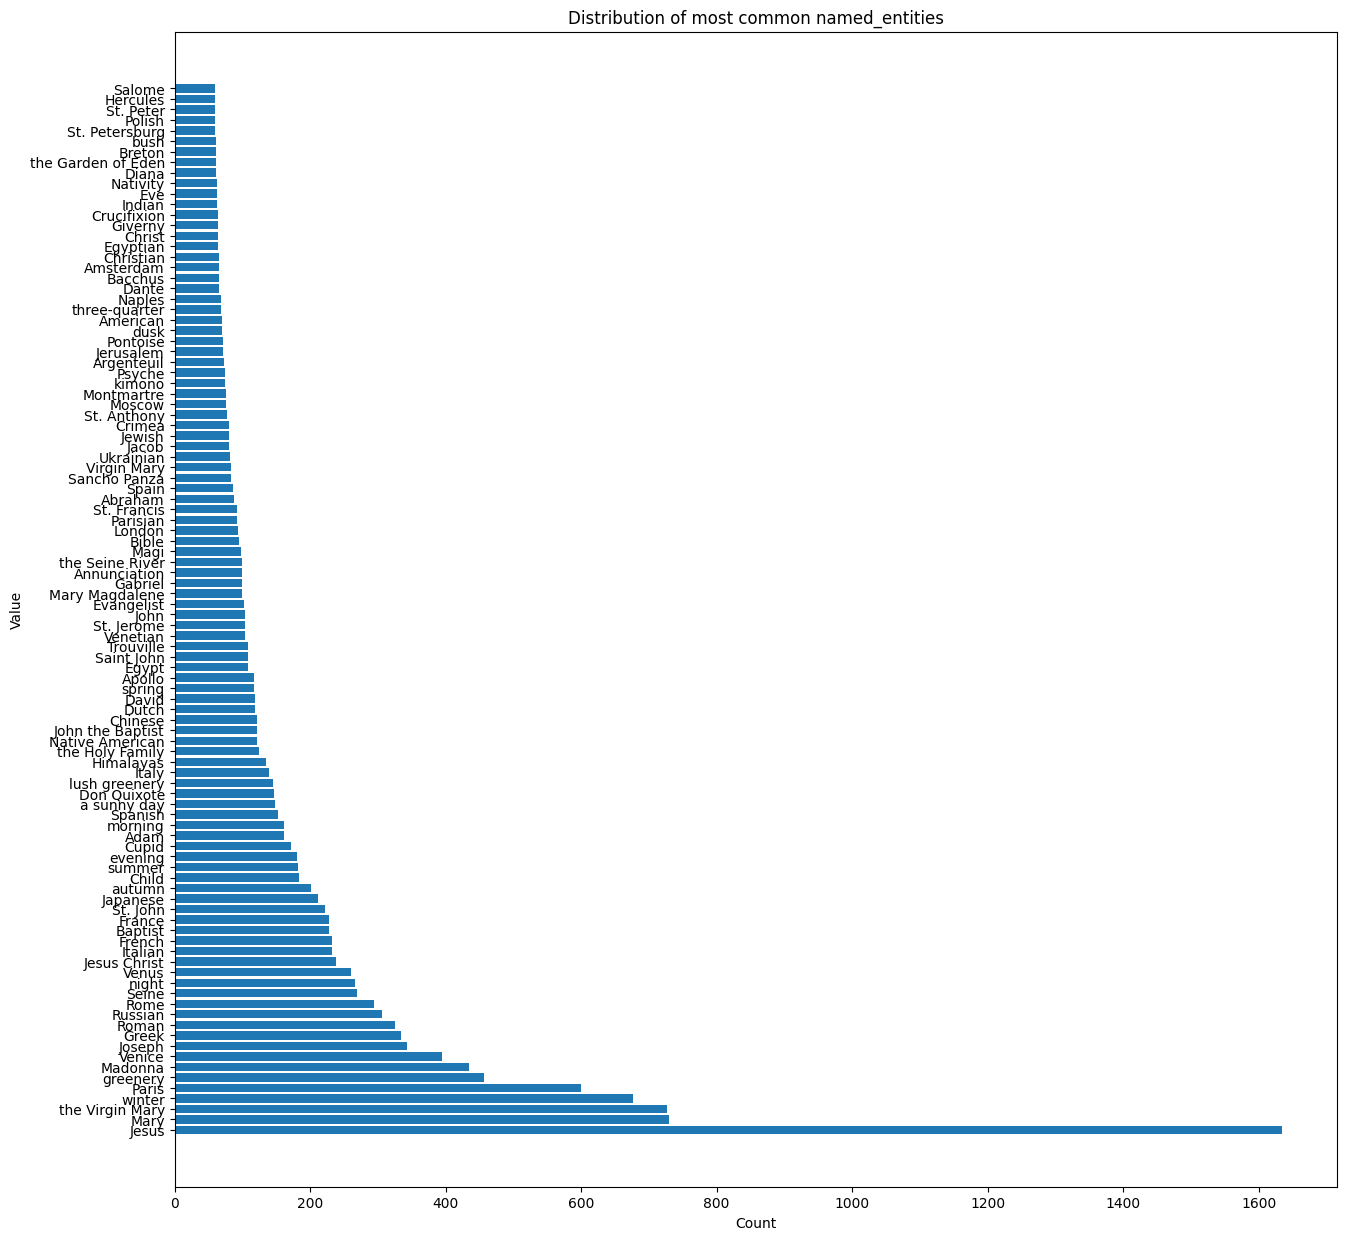

In [53]:
plot_multilabel_column(df, "named_entities")